# Downside Risk and Sortino Ratio

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
returns = pd.read_csv("returns.csv", index_col = "Date", parse_dates = ["Date"])
returns

,GBP_USD,USD_GBP,Levered,Low_Vol,Random,Neutral
Date,,,,,,
2010-01-02,-0.002733,0.002733,0.006275,0.0,0.002733,0
2010-01-03,-0.001727,0.001727,0.003967,0.0,0.000000,0
2010-01-04,-0.005786,0.005786,0.013259,0.0,0.005786,0
2010-01-05,0.001687,-0.001687,-0.003884,0.0,0.001687,0
2010-01-06,-0.005446,0.005446,0.012482,0.0,0.005446,0
...,...,...,...,...,...,...
2020-12-23,0.005004,-0.005004,-0.011548,0.0,-0.005004,0
2020-12-27,-0.008278,0.008278,0.018937,0.0,-0.008278,0
2020-12-28,0.003799,-0.003799,-0.008760,0.0,-0.003799,0


<Axes: xlabel='Date'>

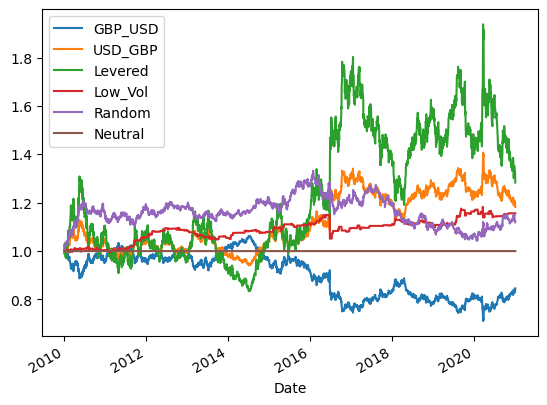

In [4]:
returns.cumsum().apply(np.exp).plot()

In [5]:
td_year = returns.count() / ((returns.index[-1] - returns.index[0]).days / 365.25)
td_year

GBP_USD    285.559091
USD_GBP    285.559091
Levered    285.559091
Low_Vol    285.559091
Random     285.559091
Neutral    285.559091
dtype: float64

## Downside Deviation (Semi-Deviation)

In [6]:
symbol = "USD_GBP"

In [7]:
TMR = 0 # target minimum return

In [8]:
excess_returns = returns[symbol] - TMR # excess return over TMR
excess_returns

Date
2010-01-02    0.002733
2010-01-03    0.001727
2010-01-04    0.005786
2010-01-05   -0.001687
2010-01-06    0.005446
                ...   
2020-12-23   -0.005004
2020-12-27    0.008278
2020-12-28   -0.003799
2020-12-29   -0.009054
2020-12-30   -0.003012
Name: USD_GBP, Length: 3139, dtype: float64

In [9]:
excess_returns = np.where(excess_returns < 0, excess_returns, 0) # setting positive excess return to zero
excess_returns

array([ 0.        ,  0.        ,  0.        , ..., -0.00379932,
       -0.00905404, -0.00301208])

In [10]:
downside_deviation = np.sqrt(np.mean(excess_returns**2)) # daily downside deviation
downside_deviation

0.0036313265134239915

In [13]:
# TODO: calculate by me, is it right?
ann_downside_deviation = downside_deviation * np.sqrt(td_year.iloc[0]) # anual downside deviation
ann_downside_deviation

0.06136394837951806

## Sortino Ratio

In [14]:
mean = returns[symbol].mean()
mean

5.333811413562378e-05

In [17]:
sortino = (mean - TMR) / downside_deviation * np.sqrt(td_year)
sortino

GBP_USD    0.248211
USD_GBP    0.248211
Levered    0.248211
Low_Vol    0.248211
Random     0.248211
Neutral    0.248211
dtype: float64

## Putting everything together

In [18]:
def sortino(series, TMR = 0):
    excess_returns = (series - TMR)
    downside_deviation = np.sqrt(np.mean(np.where(excess_returns < 0, excess_returns, 0) ** 2))
    
    if downside_deviation == 0:
        return np.nan
    else:
        sortino = (series.mean() - TMR) / downside_deviation * np.sqrt(series.count() / ((series.index[-1] - series.index[0]).days / 365.25))
        return sortino

In [20]:
returns.apply(sortino).sort_values(ascending = False)

Low_Vol    0.396547
USD_GBP    0.248211
Random     0.182185
Levered    0.159784
GBP_USD   -0.225971
Neutral         NaN
dtype: float64

In [21]:
sortino(series = returns.USD_GBP, TMR = 0)

0.24821061528136432